In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set_palette("Pastel1")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

Cargamos el archivo csv

In [ ]:
from google.colab import files
import io
archivo=files.upload()
data=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data9.csv']),delimiter=",")

Saving HCV-Egy-Data4.csv to HCV-Egy-Data4.csv


Verificamos si los datos se cargaron en su totalidad

In [ ]:
len(data)

1385

Verificamos el tipo de atributos de los datos.

In [ ]:
data.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [ ]:
data['RBC'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: RBC, Length: 1385, dtype: object

In [ ]:
data['Plat'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: Plat, Length: 1385, dtype: object

In [ ]:
data['ALT4'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: ALT4, Length: 1385, dtype: object

In [ ]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,1


In [ ]:
data.columns=['Age','Gender','BMI','Fever','Nausea/ Vomting','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain',
              'WBC','RBC','HGB','Plat','AST 1','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24w',
              'RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Baseline Histological Grading','Baseline Histological Staging']

In [ ]:
dataC=data.copy()

In [ ]:
#Change the data type to correct form - in this case integer -> category type for
#'gender': category type Male = 1 & Female = 2
dataC['Gender'] = dataC['Gender'].apply({1:'Male', 2:'Female'}.get)

#from 'fever' column to 'epigastric pain' column: Absent = 1 & Present = 2
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].apply({1:'Absent', 2:'Present'}.get)

# setting the stages
dataC['Baseline Histological Staging'] = dataC['Baseline Histological Staging'].apply({
    0:'No Fibrosis',
    1:'Portal Fibrosis',
    2:'Few Septa',
    3:'Many Septa',
    4:'Cirrhosis'
}.get)

In [ ]:
#Set Gender and Staging values to category
dataC['Gender'] = dataC['Gender'].astype('category')
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].astype('category')

dataC['Baseline Histological Staging'] = dataC['Baseline Histological Staging'].astype('category')
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].astype('category')

In [ ]:
dataC.head()

,Age,Gender,BMI,Fever,Nausea/ Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric Pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading,Baseline Histological Staging
0,56,Male,35,Present,Absent,Absent,Absent,Present,Present,Present,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13,Few Septa
1,46,Male,29,Absent,Present,Present,Absent,Present,Present,Absent,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4,Few Septa
2,57,Male,33,Present,Present,Present,Present,Absent,Absent,Absent,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4,Cirrhosis
3,49,Female,33,Absent,Present,Absent,Present,Absent,Present,Absent,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10,Many Septa
4,59,Male,32,Absent,Absent,Present,Absent,Present,Present,Present,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11,Portal Fibrosis


In [ ]:
dataC.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000


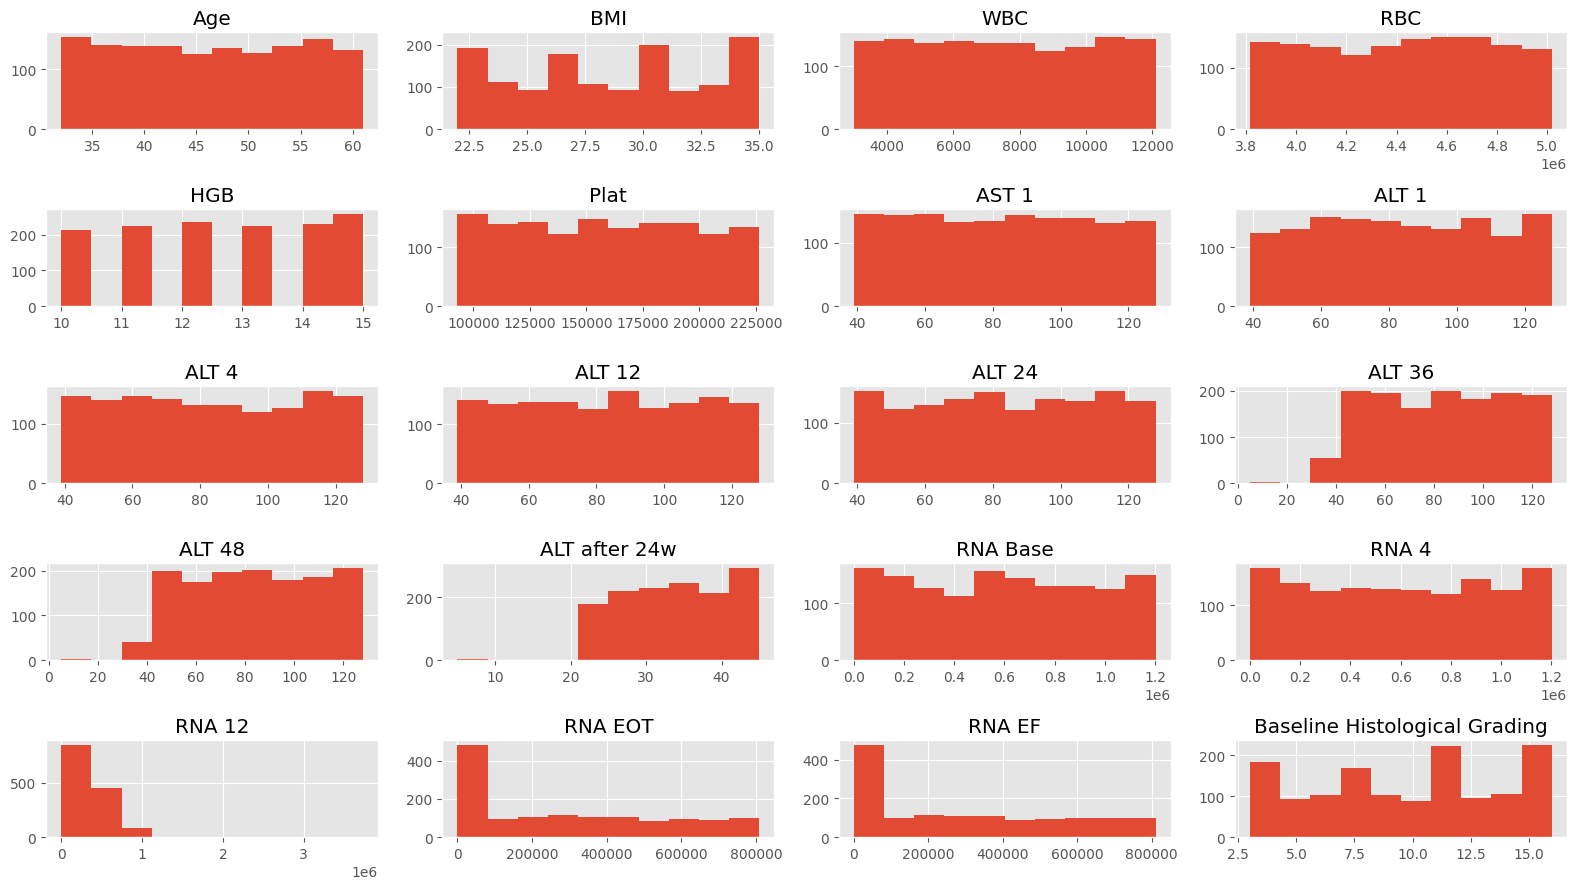

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataC.drop(["Fever", "Gender","Fever", "Nausea/ Vomting","Headache" , "Diarrhea","Fatigue","Jaundice", "Epigastric Pain","Baseline Histological Staging"  ],axis=1).hist()
plt.tight_layout()
plt.show()


Ahora vamos a verificar cuales de las siguientes caracteristicas tiene distribución normal

In [ ]:
import pandas as pd
from scipy.stats import normaltest


columnas=dataC.drop(["Fever", "Gender","Fever", "Nausea/ Vomting","Headache" , "Diarrhea","Fatigue","Jaundice", "Epigastric Pain","Baseline Histological Staging"  ],axis=1).copy()
normal = []
noNormal = []

for columnaActual in columnas:
    datosColumna = data[columnaActual]
    stat, p = normaltest(datosColumna)

    if p > 0.05:
        normal.append(columnaActual)
    else:
        noNormal.append(columnaActual)

print("Con distribución normal:", normal)
print("Sin distribución normal:", noNormal)

Con distribución normal: []
Sin distribución normal: ['Age', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT 4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline Histological Grading']


In [ ]:
columnas.head(5)

,Age,BMI,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT 4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline Histological Grading
0,56,35,7425,4248807.0,14,112132.0,99,84,52.0,109,81,5,5,5,655330,634536,288194,5,5,13
1,46,29,12101,4429425.0,10,129367.0,91,123,95.0,75,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,33,4178,4621191.0,12,151522.0,113,49,95.0,107,116,5,5,5,571148,661346,5,735945,558829,4
3,49,33,6490,4794631.0,10,146457.0,43,64,109.0,80,88,48,77,33,1041941,449939,585688,744463,582301,10
4,59,32,3661,4606375.0,11,187684.0,99,104,67.0,48,120,94,90,30,660410,738756,3731527,338946,242861,11


Creamos la matriz de correlación

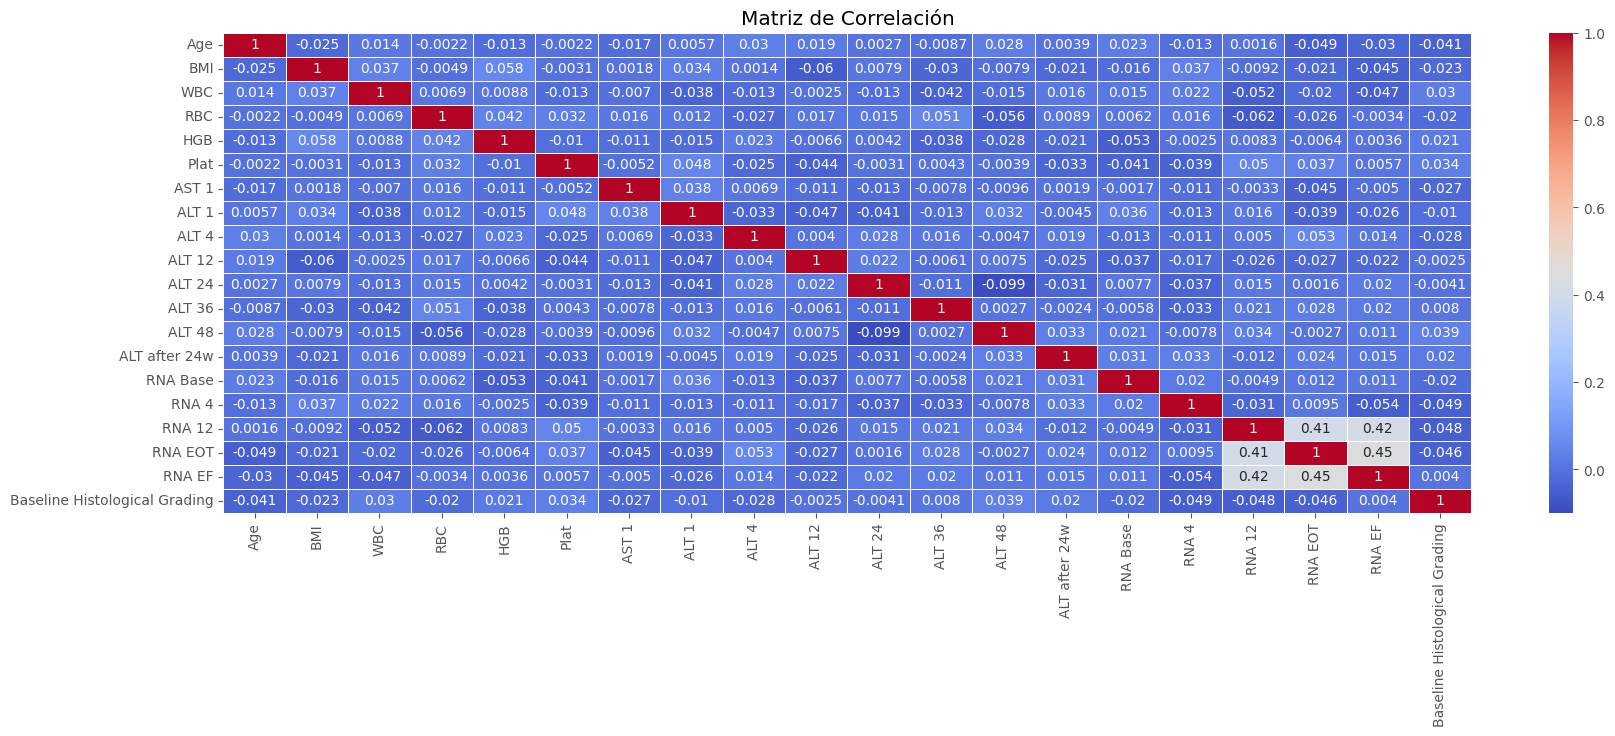

In [ ]:
correlation_matrix = columnas.corr()

# Visualiza la matriz de correlación utilizando un mapa de calor con márgenes más amplios
plt.figure(figsize=(26, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Ajusta los márgenes para separar más los subcuadros
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

plt.title('Matriz de Correlación')
plt.show()

Creamos los las gráficas de barras para observar las variables categóricas.

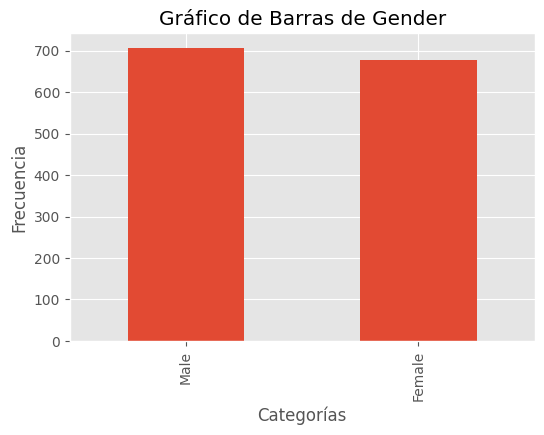

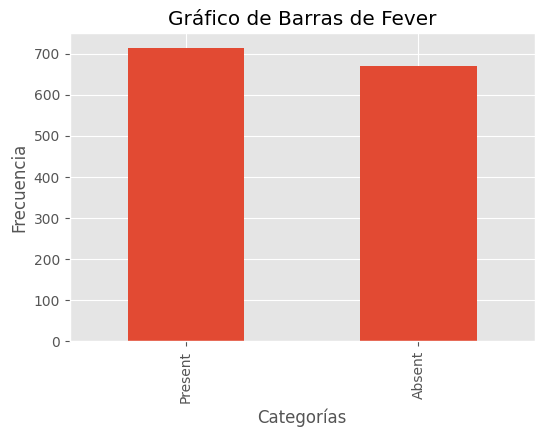

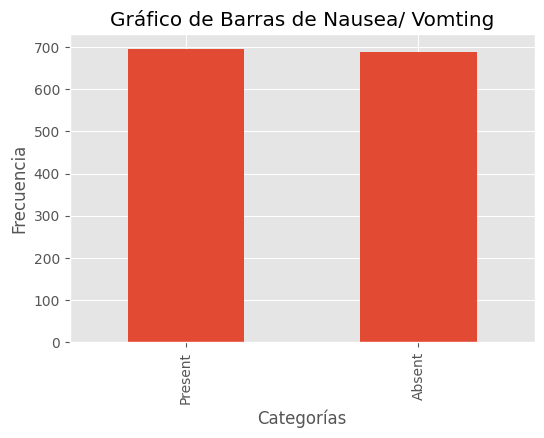

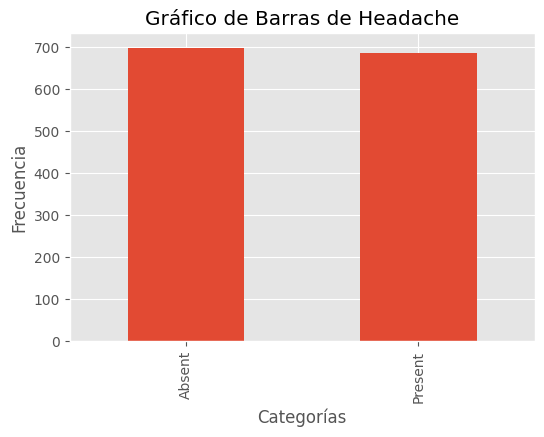

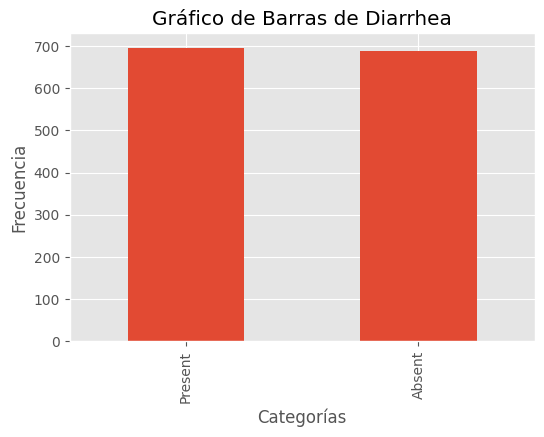

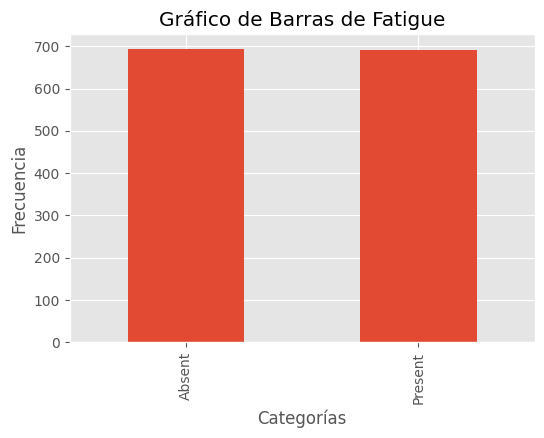

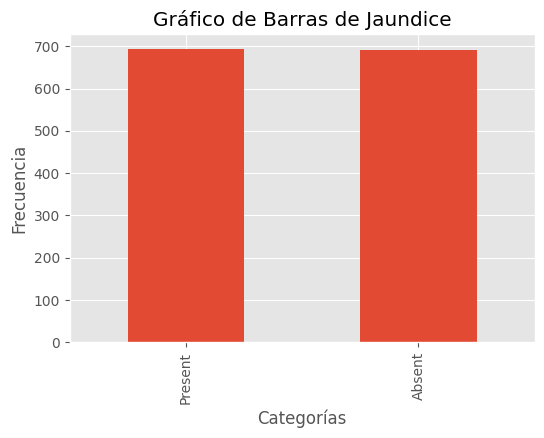

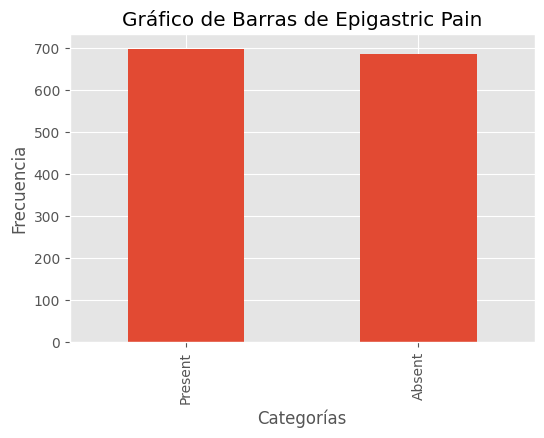

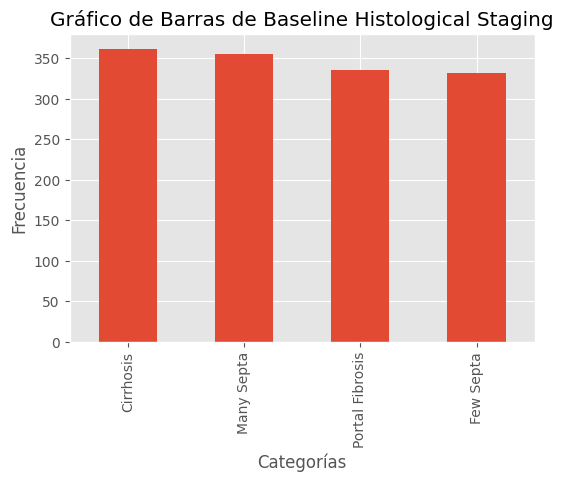

In [ ]:
columnas=dataC.drop(["Age", "BMI","WBC", "RBC","HGB" , "Plat","AST 1","ALT 1", "ALT 4","ALT 12", "ALT 24","ALT 36", "ALT 48","ALT after 24w" , "RNA Base","RNA 4","RNA 12", "RNA EOT","RNA EF" ,"Baseline Histological Grading" ],axis=1).copy()


# Itera a través de todas las columnas en el DataFrame
for columna in columnas.columns:
        plt.figure(figsize=(6, 4))
        # Verifica si la columna es de tipo 'object' (categórica)
        # Genera un gráfico de barras solo para las columnas categóricas
        columnas[columna].value_counts().plot(kind='bar')
        plt.title(f'Gráfico de Barras de {columna}')
        plt.xlabel('Categorías')
        plt.ylabel('Frecuencia')
        plt.show()

Observamos la dens

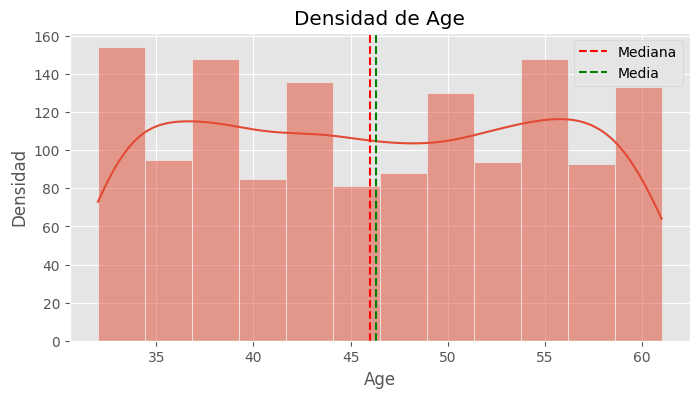

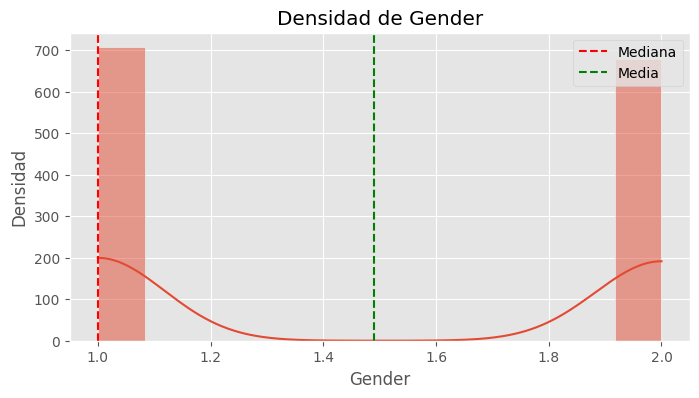

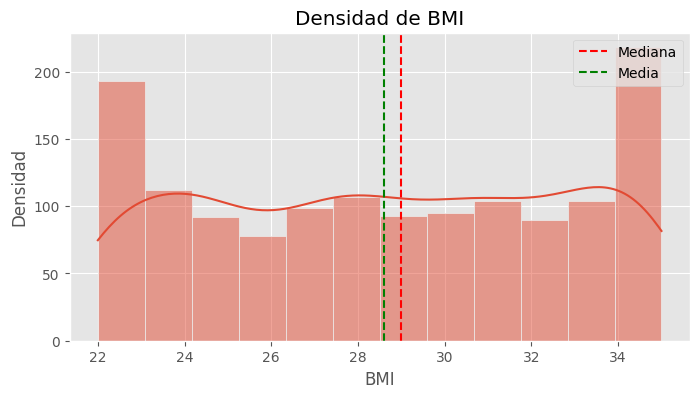

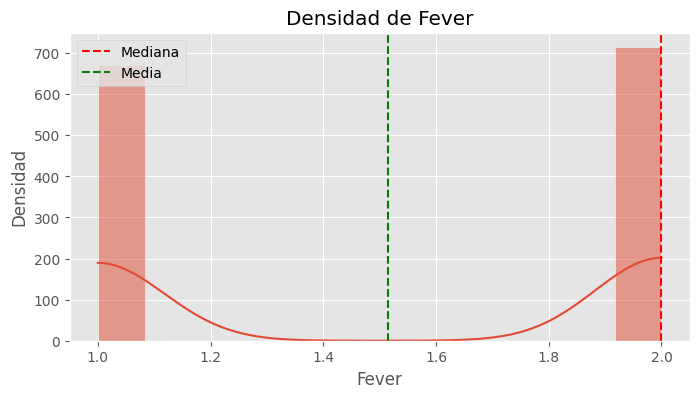

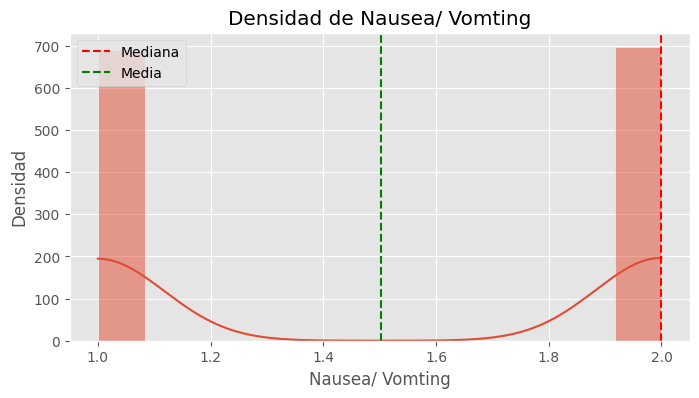

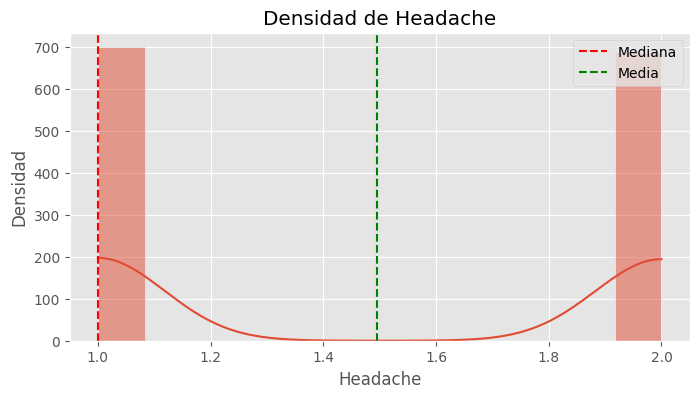

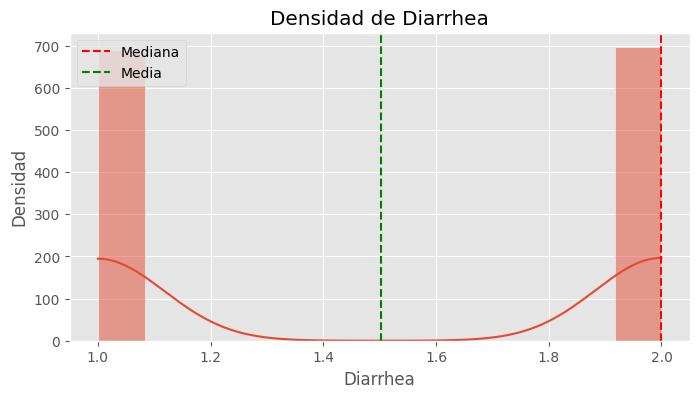

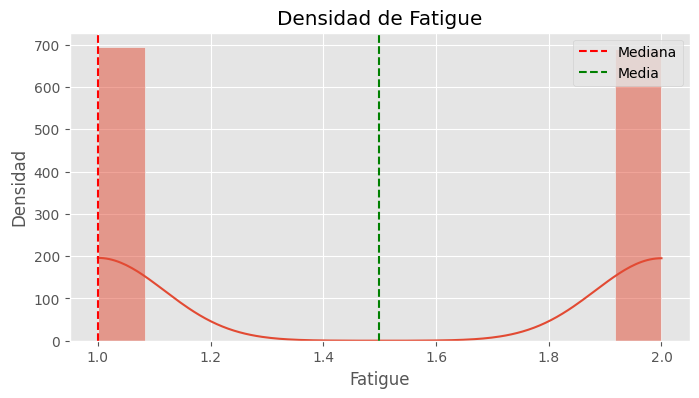

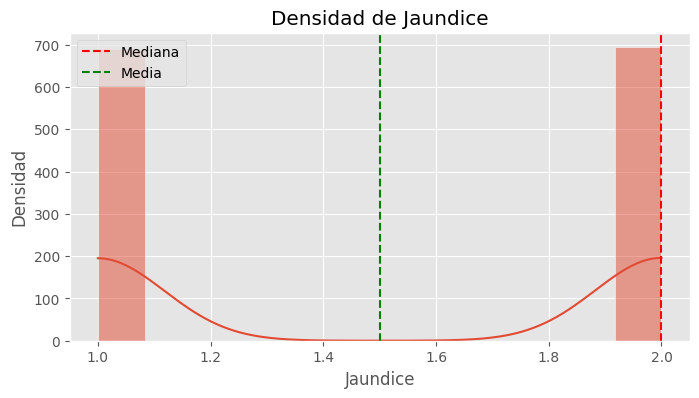

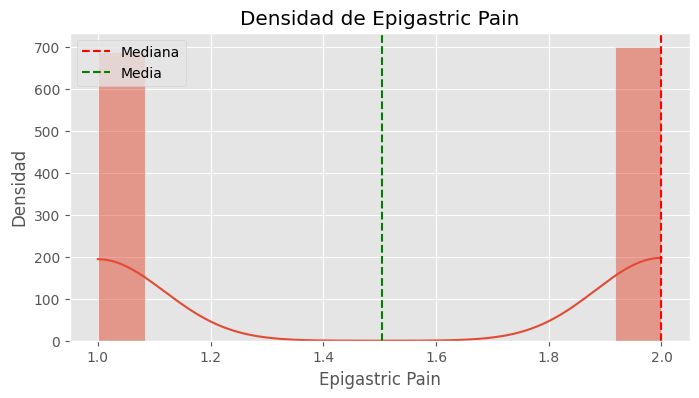

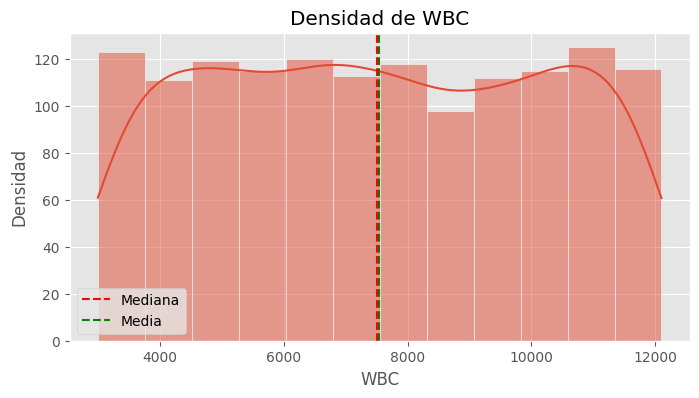

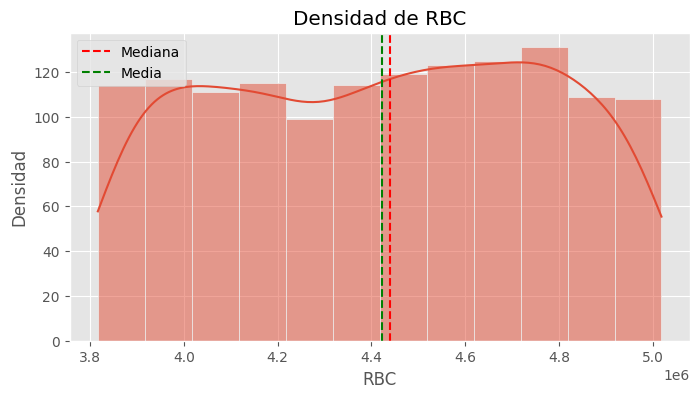

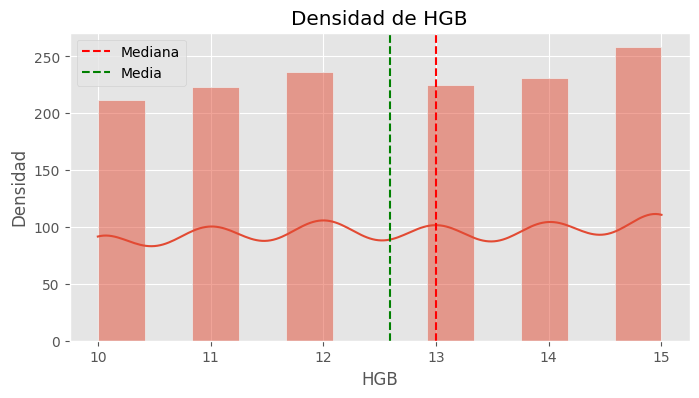

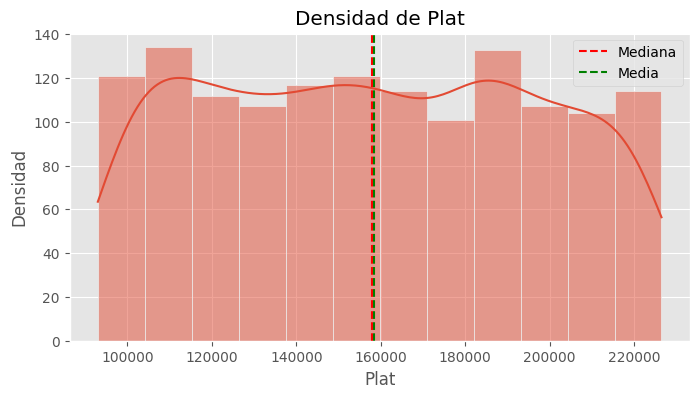

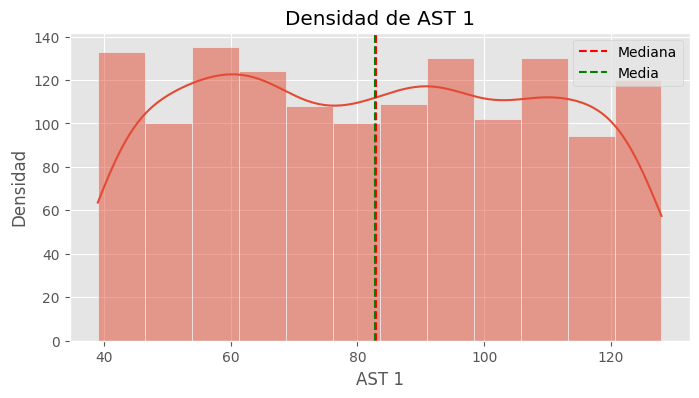

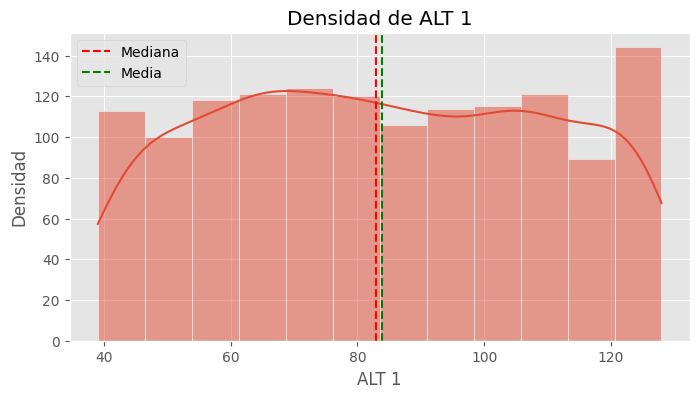

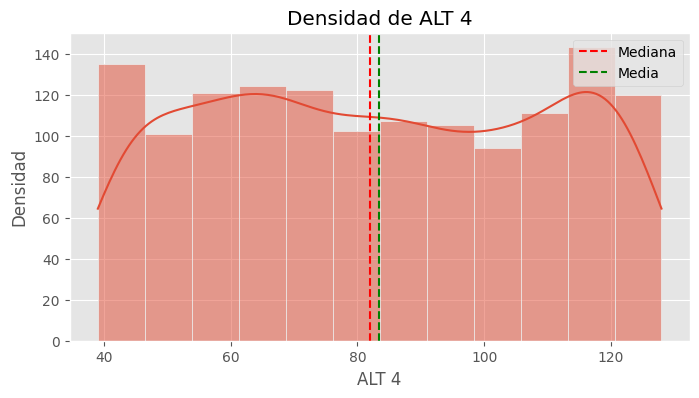

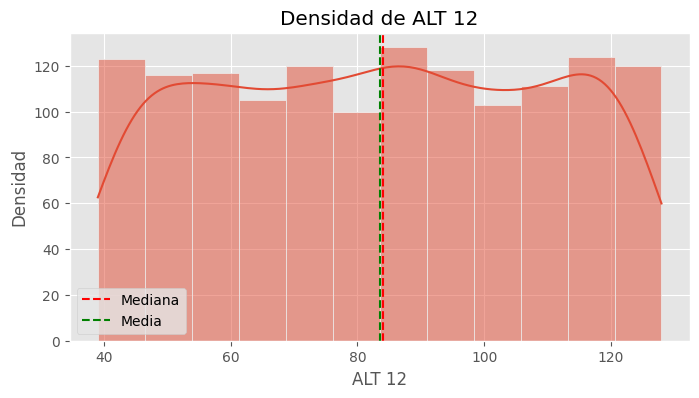

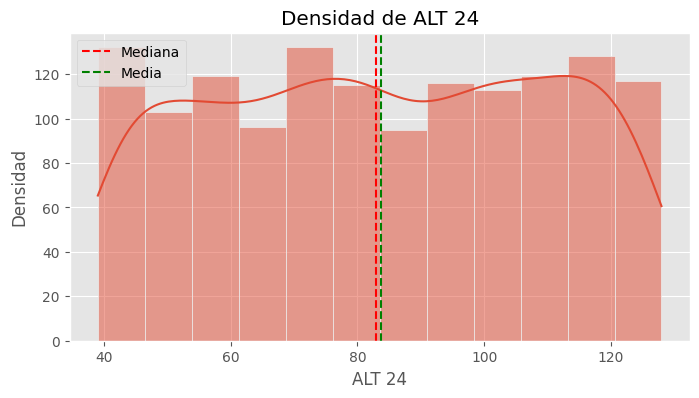

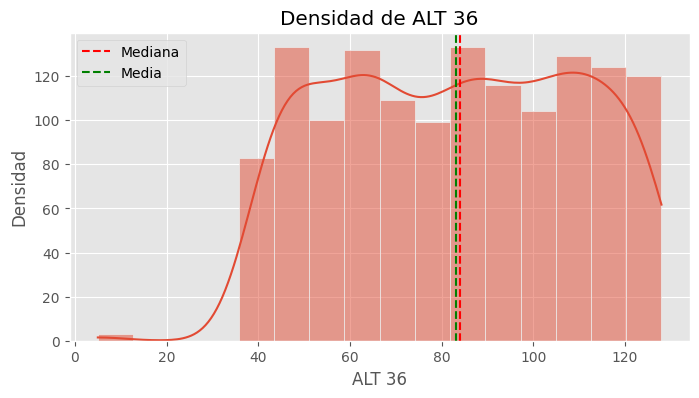

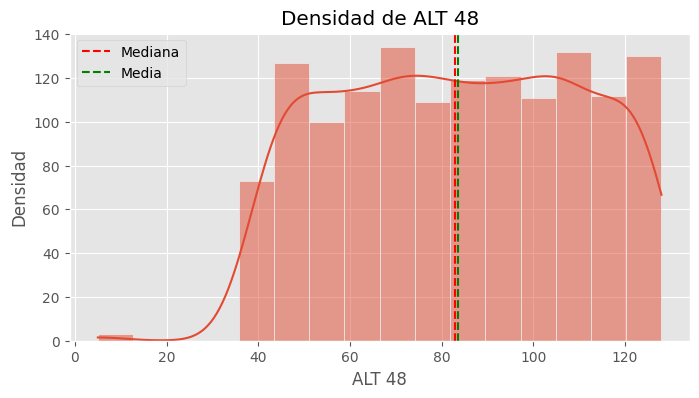

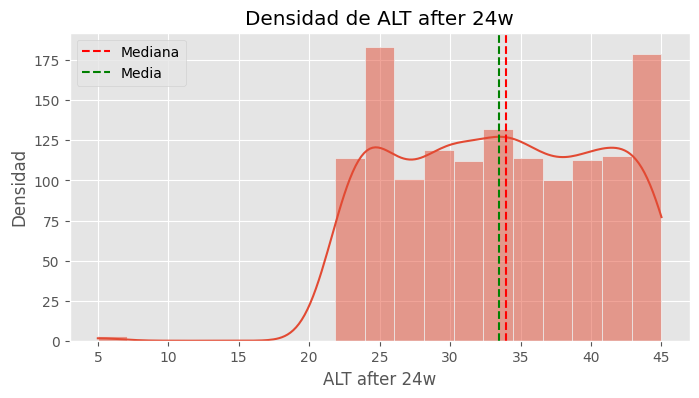

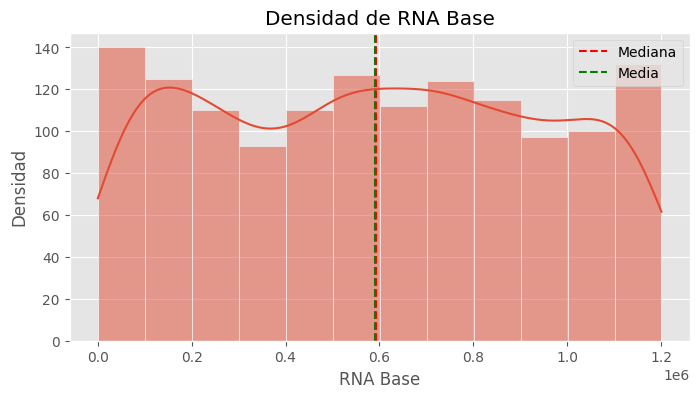

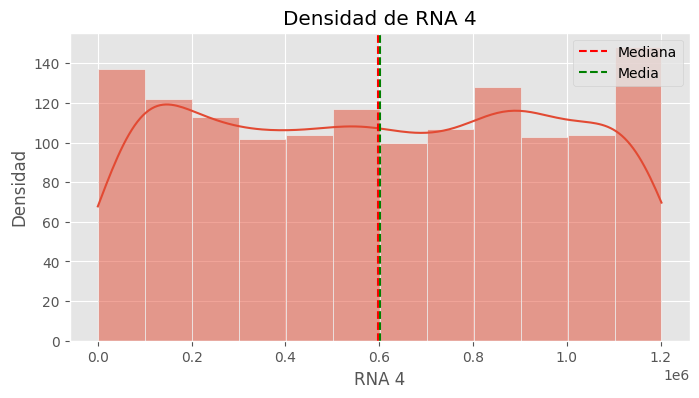

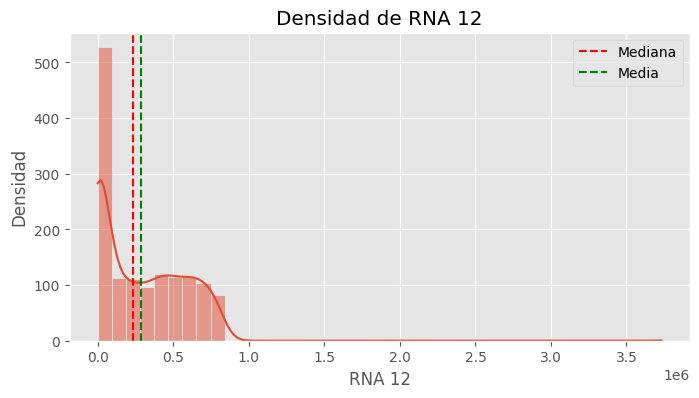

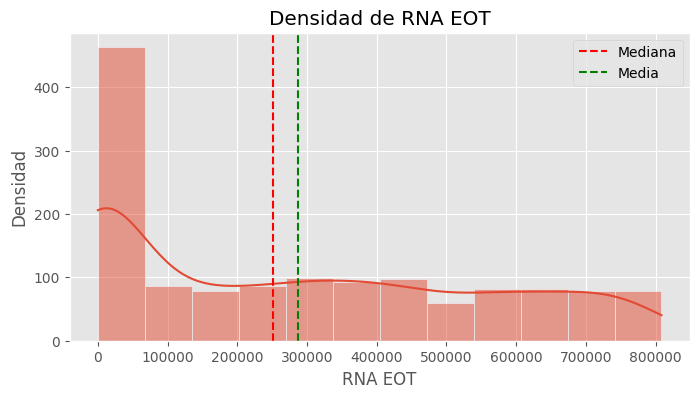

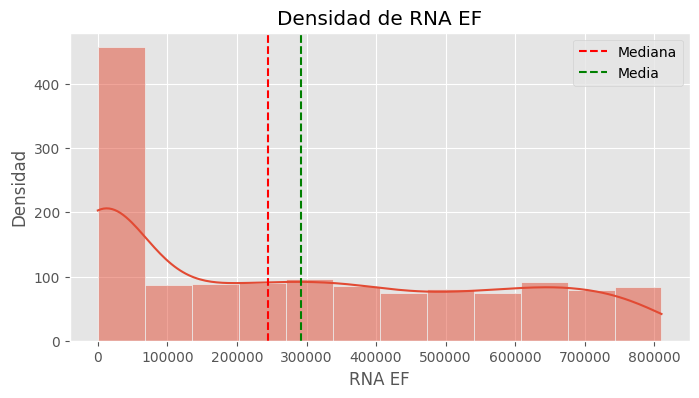

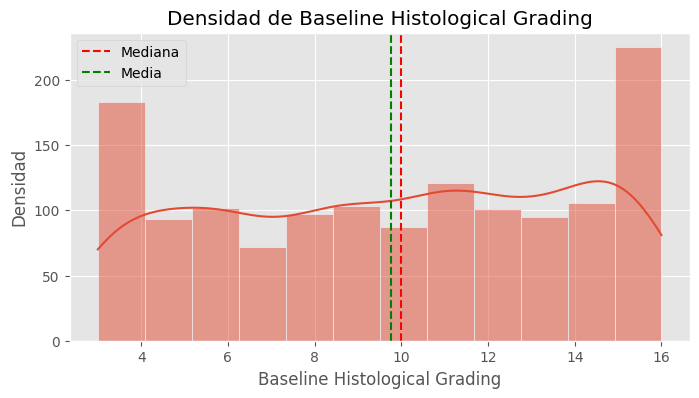

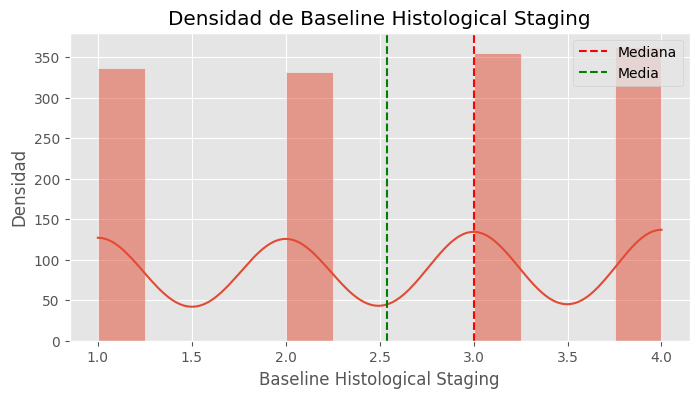

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Itera a través de todas las columnas numéricas y traza gráficos de densidad
for column in data.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    sns.histplot(data[column], kde=True)  # Crea el gráfico de densidad
    plt.axvline(data[column].median(), color='red', linestyle='dashed', label='Mediana')  # Línea de la mediana
    plt.axvline(data[column].mean(), color='green', linestyle='dashed', label='Media')  # Línea de la media
    plt.title(f'Densidad de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Densidad')  # Etiqueta del eje y
    plt.legend()  # Muestra la leyenda
    plt.show()  # Muestra el gráfico

# Cierra todos los gráficos abiertos al final
plt.close('all')

<Figure size 1600x800 with 0 Axes>

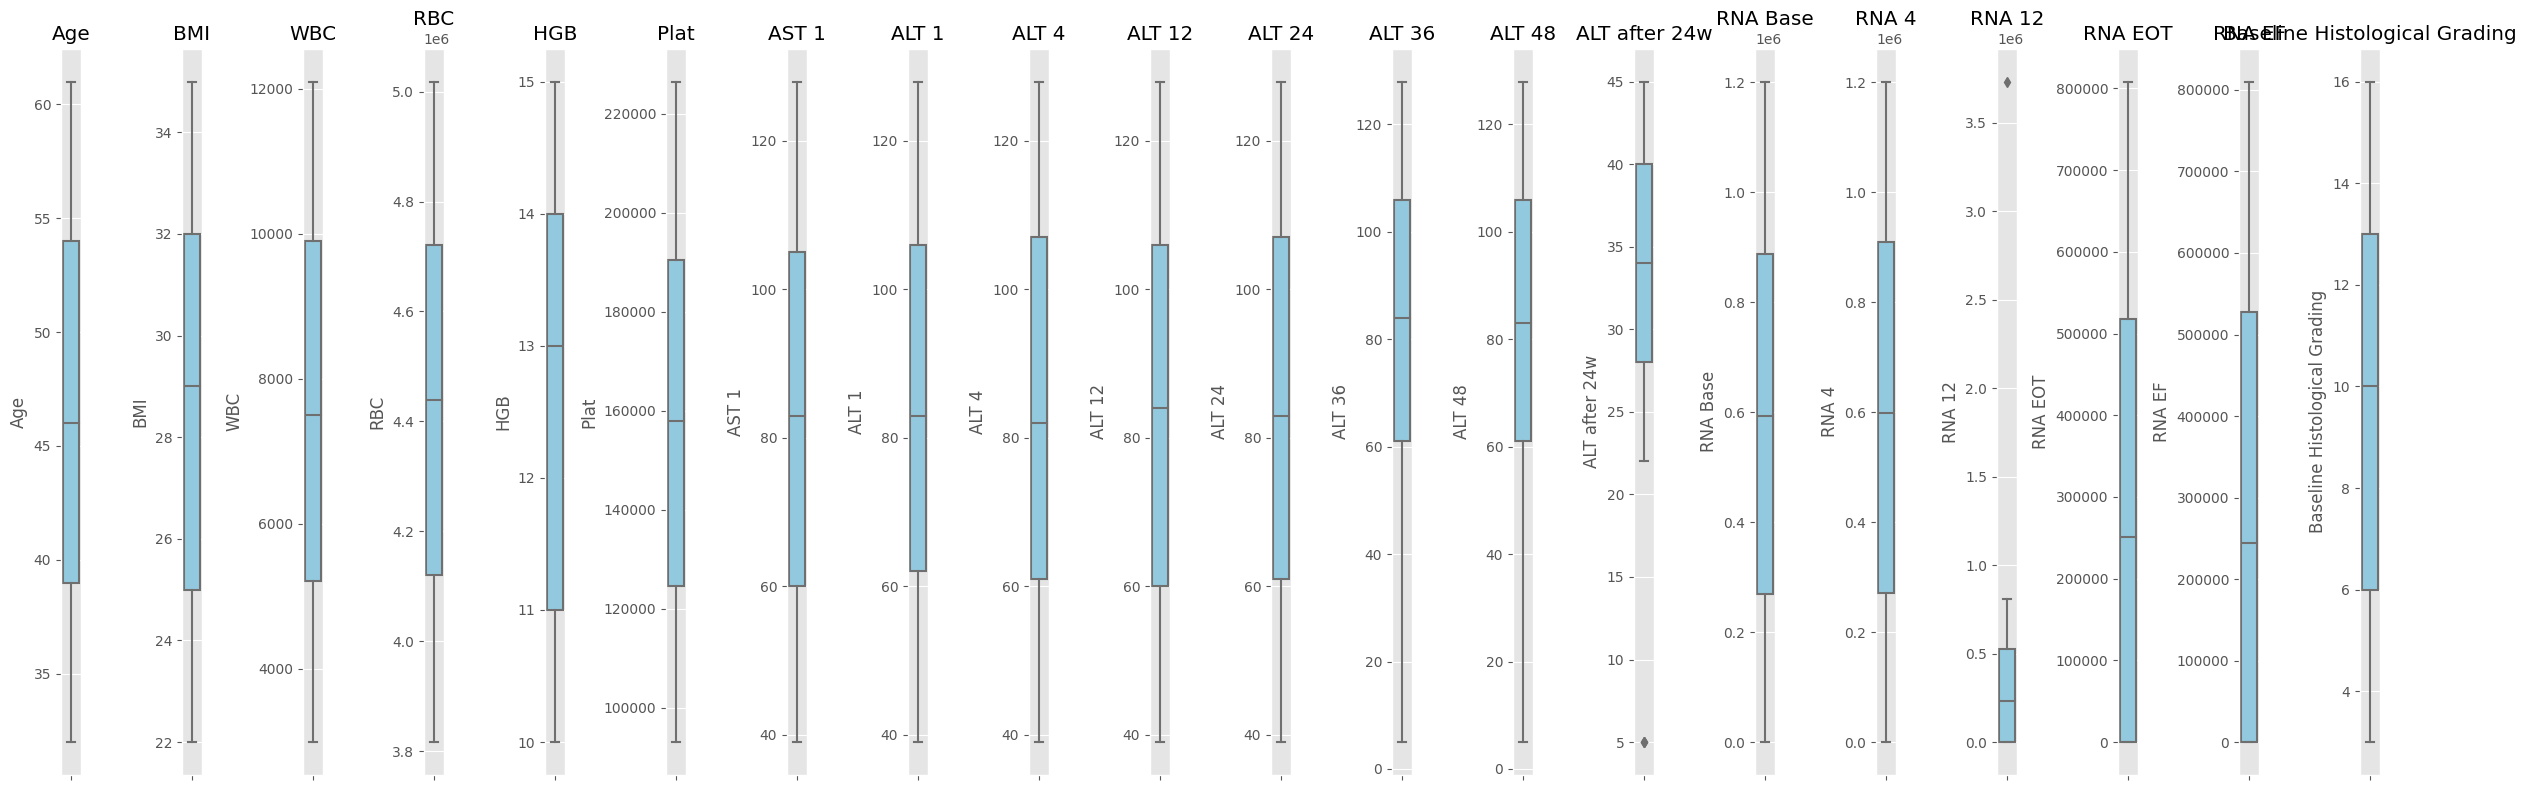

In [ ]:
data = dataC.drop(["Fever", "Gender", "Nausea/ Vomting", "Headache", "Diarrhea", "Fatigue", "Jaundice", "Epigastric Pain", "Baseline Histological Staging"], axis=1)
plt.figure(figsize=(16, 8))  # Establece el tamaño de la figura

wspace = 2
fig, axes = plt.subplots(1, len(data.columns), figsize=(24, 8))
fig.subplots_adjust(wspace=wspace)

for i, columna in enumerate(data.columns):
    plt.subplot(1, len(data.columns), i + 1)
    sns.boxplot(y=data[columna], orient='vertical', color='skyblue')
    plt.title(columna)

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()  # Muestra los diagramas de caja